                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   34
Model:                            GLM   Df Residuals:                       32
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -203.51
Date:                Fri, 17 Jan 2025   Deviance:                       309.15
Time:                        17:31:45   Pearson chi2:                     300.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7811      0.072     24.713      0.0

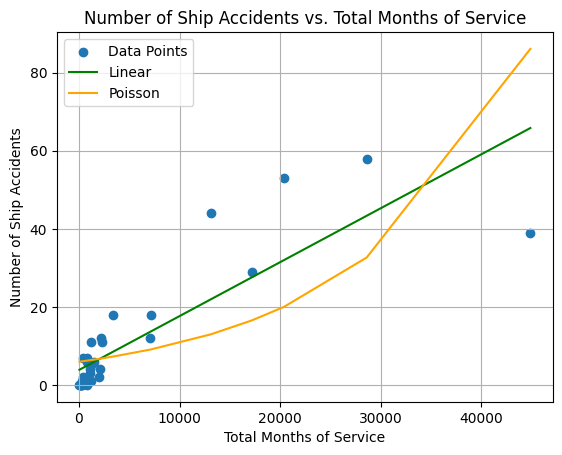

MSE Poisson: 171 Linear: 68


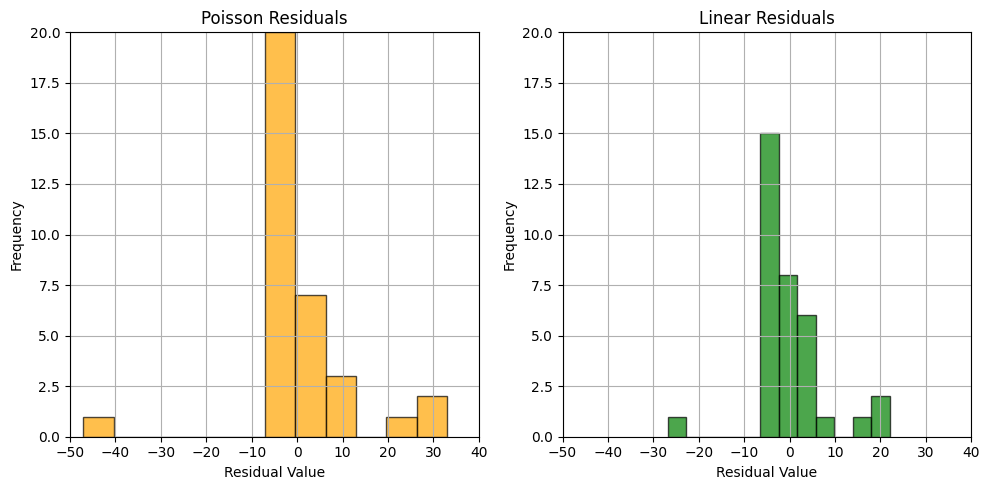

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

def plot_residuals(residuals_poisson, residuals_linear):
    plt.figure(figsize=(10, 5))

    # Poisson Residuals
    plt.subplot(1, 2, 1)
    plt.hist(residuals_poisson, bins=12, color="orange", edgecolor="black", alpha=0.7)
    plt.title("Poisson Residuals")
    plt.xlabel("Residual Value")
    plt.ylabel("Frequency")
    plt.xlim(-50, 40)
    plt.ylim(0, 20)
    plt.grid()

    # Linear Residuals
    plt.subplot(1, 2, 2)
    plt.hist(residuals_linear, bins=12, color="green", edgecolor="black", alpha=0.7)
    plt.title("Linear Residuals")
    plt.xlabel("Residual Value")
    plt.ylabel("Frequency")
    plt.xlim(-50, 40)
    plt.ylim(0, 20)
    plt.grid()

    plt.tight_layout()
    plt.show()

def main():
    url = "https://raw.githubusercontent.com/jh85/glm/refs/heads/main/ship_accident.txt"
    df = pd.read_csv(url, sep=r"\s+")

    # drop rows containing non-numerical data, and convert Months and Acc to float
    df = df[pd.to_numeric(df["Months"], errors="coerce").notnull()]
    df["Months"] = df["Months"].astype(float)
    df["Acc"] = df["Acc"].astype(float)

    x = df.Months.to_numpy()
    y = df.Acc.to_numpy()

    glm_x = sm.add_constant(x)
    poisson_model = sm.GLM(y, glm_x, family=sm.families.Poisson())
    poisson_results = poisson_model.fit()
    print(poisson_results.summary())
    
    def fitted_poisson_line(x):
        #      np.exp(1.7811                    + 5.959e-5                  * x)
        return np.exp(poisson_results.params[0] + poisson_results.params[1] * x)

    # plt.plot() requires sorted inputs
    x_sorted = np.sort(x)
    y_poisson = fitted_poisson_line(x_sorted)

    linear_model = LinearRegression()
    linear_model.fit(x.reshape(-1,1),y)
    y_linear  = linear_model.predict(x_sorted.reshape(-1,1))

    plt.scatter(x, y, label="Data Points")
    plt.plot(x_sorted, y_linear, color="green", label="Linear")
    plt.plot(x_sorted, y_poisson, color="orange", label="Poisson")
    plt.ylabel("Number of Ship Accidents")
    plt.xlabel("Total Months of Service")
    plt.grid()
    plt.legend()
    plt.title("Number of Ship Accidents vs. Total Months of Service")
    plt.show()

    # compare MSE to see which model is better. 
    y_pred_poisson = fitted_poisson_line(x)
    y_pred_linear = linear_model.predict(x.reshape(-1,1))
    mse_poisson = mean_squared_error(y, y_pred_poisson)
    mse_linear = mean_squared_error(y, y_pred_linear)
    print(f"MSE Poisson: {round(mse_poisson)} Linear: {round(mse_linear)}")

    # check the residuals of each regression
    residuals_poisson = y - y_pred_poisson
    residuals_linear = y - y_pred_linear
    plot_residuals(residuals_poisson, residuals_linear)

main()